In [1]:
!pip install scikit-learn

In [2]:
!pip install scipy

In [3]:
from sklearn import svm

In [4]:
# XOR의 계산 결과 데이터 --- (※1)
xor_data = [
    #P, Q, result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [5]:
# 학습을 위해 데이터와 레이블 분리하기 --- (※2)
# 학습시키기 fit() 매개변수에 필요
data = [] # 훈련 데이터
label = [] #답

In [6]:
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p, q])
    label.append(r)

In [7]:
data

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [8]:
label

[0, 1, 1, 0]

In [9]:
# 데이터 학습(훈련)시키기 fit()--- (※3)

clf = svm.SVC()
clf.fit(data, label)

SVC()

In [10]:
# 데이터 예측하기 predict() --- (※4)
pre = clf.predict(data)
pre

array([0, 1, 1, 0])

In [11]:
# 결과 확인하기 --- (※5)
ok = 0
total = 0

for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer: 
        ok += 1
    total += 1

In [12]:
print("정답률:", ok, "/", total, "=", ok/total)

정답률: 4 / 4 = 1.0


#### 프레임워크로 작성하기
- 판다스로 데이터와 레이블 나누기,


In [13]:
import pandas as pd
from sklearn import svm, metrics

In [16]:
xor_input = xor_data[:]

In [21]:
# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.loc[:,0:1]  #데이터
xor_label = xor_df.loc[:,2]   #레이블

In [22]:
# 데이터 학습, 훈련 / 모델만들기 --- (※2)
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)   #예측

In [23]:
pre

array([0, 1, 1, 0], dtype=int64)

In [24]:
ac_score = metrics.accuracy_score(xor_label, pre)
ac_score

1.0

In [25]:
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

#### 붓꽃의 품종 분류하기

In [26]:
import random, re

In [27]:
csv = []
with open('pyml_rev_examples/ch4/iris.csv','r',encoding='utf-8') as fp:
    # 한 줄씩 읽어 들이기
    for line in fp:
        line = line.strip()   # 줄바꿈 제거
        cols = line.split(',')# 쉼표로 자르기
        #문자열 데이터를 숫자로 변환
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$',n) else n
        cols = list(map(fn, cols))
        csv.append(cols)

del csv[0] # 헤더 제거

In [28]:
csv[:3]

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']]

In [29]:
data = pd.read_csv('pyml_rev_examples/ch4/iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
random.shuffle(csv)

In [31]:
total_len = len(csv)
total_len

150

In [33]:
# train 100 : test 50
train_len = int(total_len * 2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []

In [34]:
for i in range(total_len):
    data  = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

In [35]:
train_data[:3]

[[4.6, 3.6, 1.0, 0.2], [5.0, 3.4, 1.5, 0.2], [4.7, 3.2, 1.6, 0.2]]

In [36]:
train_label[:3]

['Iris-setosa', 'Iris-setosa', 'Iris-setosa']

In [37]:
test_data[:3]

[[6.6, 3.0, 4.4, 1.4], [6.1, 3.0, 4.6, 1.4], [6.0, 2.2, 4.0, 1.0]]

In [38]:
test_label[:3]

['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']

In [39]:
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [41]:
ac_score = metrics.accuracy_score(test_label, pre)
ac_score

0.98

In [46]:
from sklearn.model_selection import train_test_split

In [42]:
csv = pd.read_csv('pyml_rev_examples/ch4/iris.csv')

In [43]:
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

In [44]:
csv_label.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: Name, dtype: object

In [47]:
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)


In [48]:
train_data.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
106,4.9,2.5,4.5,1.7
82,5.8,2.7,3.9,1.2
120,6.9,3.2,5.7,2.3


In [49]:
train_label.head(3)

106     Iris-virginica
82     Iris-versicolor
120     Iris-virginica
Name: Name, dtype: object

In [50]:
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [52]:
ac_score = metrics.accuracy_score(test_label, pre)
ac_score

0.9473684210526315

### 손글씨 숫자 인식

#### 데이터 구조
- 이미지데이터는 각 픽셀을 그레이스케일 256단계
- 왼쪽 위부터 오른쪽 아래로 차례차례 픽셀이 나열된 형태
- 0:흰색, 1~255 숫자가 클수록 짙은 부분

In [53]:
# binary(2진파일) 파일 변환위한 모듈
import struct

In [55]:
def to_csv(name, maxdata):
    lbl_f = open("mnist/"+name+"-labels.idx1-ubyte", "rb")
    img_f = open("mnist/"+name+"-images.idx3-ubyte", "rb")
    csv_f = open("mnist/"+name+".csv", "w", encoding="utf-8")
    
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    
    pixels = rows * cols
    
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{}-{}-{}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
                
    csv_f.close()
    lbl_f.close()
    img_f.close()

In [56]:
to_csv("train", 1000)
to_csv("t10k", 500)

#### 이미지 데이터 학습하기
- 손글씨 숫자 데이터를 벡터로 변환

In [59]:
def load_csv(fname):
    labels = []
    images = []
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

In [60]:
data = load_csv('./mnist/train.csv')
test = load_csv('./mnist/t10k.csv')

In [62]:
#학습시키기
clf = svm.SVC()
clf.fit(data["images"], data["labels"])

SVC()

In [63]:
predict = clf.predict(test["images"])

In [64]:
ac_score = metrics.accuracy_score(test["labels"], predict)
ac_score

0.8842315369261478

#### 외국어 문장 판별하기
- 외국어 글자를 읽어 들이고 어떤 언어인지 판정하는 프로그램 만들기
- 알파벳을 사용하는 언어라도 프랑스어, 타갈로어(필리핀), 인도네시아어 등

In [65]:
from sklearn import svm, metrics
import glob, os.path, re, json

In [66]:
def check_freq(fname) : 
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() 
    cnt = [0 for n in range(0, 26)]
    code_a = ord("a")
    code_z = ord("z")
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n - code_a] += 1
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)

In [70]:
def load_files(path):
    freqs = []
    labels = []
    # glob - 특정 파일만 출력하기
    file_list = glob.glob(path)
    print(file_list)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0]) #빈도수
        labels.append(r[1])#국가명
    return {"freqs":freqs, "labels":labels}

In [71]:
data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")

['./lang/train\\en-1.txt', './lang/train\\en-2.txt', './lang/train\\en-3.txt', './lang/train\\en-4.txt', './lang/train\\en-5.txt', './lang/train\\fr-10.txt', './lang/train\\fr-6.txt', './lang/train\\fr-7.txt', './lang/train\\fr-8.txt', './lang/train\\fr-9.txt', './lang/train\\id-11.txt', './lang/train\\id-12.txt', './lang/train\\id-13.txt', './lang/train\\id-14.txt', './lang/train\\id-15.txt', './lang/train\\tl-16.txt', './lang/train\\tl-17.txt', './lang/train\\tl-18.txt', './lang/train\\tl-19.txt', './lang/train\\tl-20.txt']
['./lang/test\\en-1.txt', './lang/test\\en-2.txt', './lang/test\\fr-3.txt', './lang/test\\fr-4.txt', './lang/test\\id-5.txt', './lang/test\\id-6.txt', './lang/test\\tl-7.txt', './lang/test\\tl-8.txt']


In [72]:
with open("./lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

In [73]:
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC()

In [74]:
predict = clf.predict(test["freqs"])

In [75]:
ac_score = metrics.accuracy_score(test["labels"], predict)
ac_score

1.0

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [78]:
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

In [79]:
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

In [80]:
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)

In [81]:
df.head()

,en,fr,id,tl
a,0.073919,0.076504,0.171599,0.201979
b,0.020681,0.012910,0.025640,0.022360
c,0.033506,0.036590,0.007429,0.015670
d,0.039112,0.050464,0.040608,0.027269
e,0.131043,0.148523,0.081552,0.055009


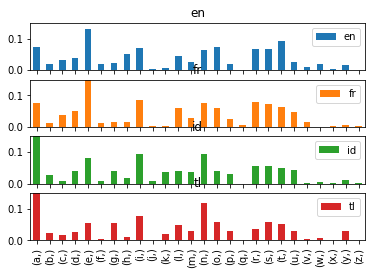

In [82]:
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")

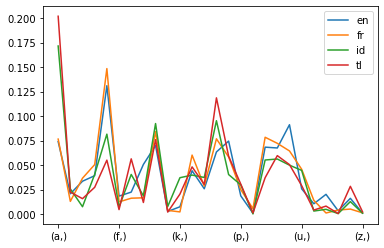

In [83]:
df.plot(kind='line')

#### Web 인터페이스 추가
- 언어판정 모델을 활용해서 언어 판정 웹 서비스 개발

In [84]:
!pip install joblib

In [86]:
from sklearn import svm 
import joblib

In [87]:
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]

In [88]:
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

SVC()

In [89]:
joblib.dump(clf, "./lang/freq-model.pkl")
print("ok")

ok


#### cgi program 구성
(파이썬 내장 웹 서버)

In [90]:
import cgi, os.path
import joblib

In [103]:
pklfile = './lang/freq-model.pkl'
clf = joblib.load(pklfile)

def show_form(text, msg=""):
    print("Content-Type: text/html; charset=utf-8")
    print("")
    print("""
        <html><body><form>
        <textarea name="text" rows="8" cols="40">{0}</textarea>
        <p><input type="submit" value="판정"></p>
        <p>{1}</p>
        </form></body></html>
    """.format(cgi.escape(text), msg))

In [100]:
# 판정하기
def detect_lang(text):
    # 알파벳 출현 빈도 구하기
    text = text.lower() 
    code_a, code_z = (ord("a"), ord("z"))
    cnt = [0 for i in range(26)]
    for ch in text:
        n = ord(ch) - code_a
        if 0 <= n < 26: cnt[n] += 1
    total = sum(cnt)
    if total == 0: return "입력이 없습니다"
    freq = list(map(lambda n: n/total, cnt))
    # 언어 예측하기
    res = clf.predict([freq])
    # 언어 코드를 한국어로 변환하기
    lang_dic = {"en":"영어","fr":"프랑스어",
        "id":"인도네시아어", "tl":"타갈로그어"}
    return lang_dic[res[0]]

In [101]:
# 입력 양식의 값 읽어 들이기
form = cgi.FieldStorage()
text = form.getvalue("text", default="")
msg = ""
if text != "":
    lang = detect_lang(text)
    msg = "판정 결과:" + lang

# 입력 양식 출력
show_form(text, msg)

Content-Type: text/html; charset=utf-8


        <html><body><form>
        <textarea name="text" rows="8" cols="40"></textarea>
        <p><input type="submit" value="판정"></p>
        <p></p>
        </form></body></html>
    


C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: cgi.escape is deprecated, use html.escape instead
  del sys.path[0]
